<h2> MOwNiT lab1 - Arytmetyka komputerowa </h2>



IEEE-754 Analysis http://babbage.cs.qc.cuny.edu/IEEE-754/

In [ ]:
bitstring(Float32(1.0))

In [ ]:
bitstring(Float64(1.0))

In [ ]:
# domyślnie Float64
bitstring(1.0)

In [ ]:
# Float16
bitstring(Float16(1.0))

In [ ]:
# znak, cecha, mantysa
#uwaga - w Julii tablice indeksujemy od 1
decode(x::Float32) = (b=bitstring(x); (b[1], b[2:9], b[10:32]))
decode(Float32(1.0))

In [ ]:
println(significand(Float32(1.0)), "*2^", exponent(Float32(1.0)))

In [ ]:
# co ile liczby sa reprezentowane 
c=Float32[]
a=Float32(1.0)
r=1:10
for i=r
    push!(c, a)
    a=nextfloat(a)
end
map(x-> bitstring(x),c)

In [ ]:
# Maszynowe epsilon mówi, jaki jest odstęp między kolejnymi liczbami zmiennoprzecinkowymi reprezentowanymi w komputerze
eps(Float32(1))

In [ ]:
eps(Float32)


In [ ]:
# Badanie postaci zdenormalizowanej. Co się dzieje, jak liczby są coraz mniejsze?
a=Float32(1.1)
for i=1:149
    a=a/Float32(2.0)
    println(decode(a), "  ", issubnormal(a))
end

In [ ]:
#Pkg.add("Plots")
# http://docs.juliaplots.org/latest/tutorial/
using Plots

In [ ]:
scatter(1:1:5, [2,2,3,3,5])

<b> Zadanie 1 </b>  Porównać w języku Julia reprezentację bitową liczby 1/3 dla Float32, Float64 oraz liczby, 
która jest inicjalizowana jako Float32, a potem rzutowana na Float64.

<b>Zadanie 2</b> Zbadać, jak zmienia się odległość między kolejnymi liczbami zminnoprzecinkowymi 
reprezentowanymi w komputerze za pomocą języka Julia. 
Narysować wykres używając Plots zależności odległości od wartości liczby dla zakresu  od 1.0 do 1000.0 z krokiem 1.0.

<b>Zadanie 3</b> Jedną z bibliotek numerycznych, jaką będziemy używać na zajęciach jest <a href="http://home.agh.edu.pl/~kzajac/dydakt/mownit/lab1/gsl.html">GSL</a> (język C). Korzystając ze <a href="https://www.gnu.org/software/gsl/doc/html/ieee754.html"> wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych</a> zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?

<b>Zadanie 4</b> Wymyślić własny przykład algorytmu niestablinego numerycznie. 
1. Zademostrować wersję niestabilną, pokazać, że działa źle.
2. Wyjaśnić, dlaczego działa źle.
3. Zademonstować wersję stabilną.
4. Język dowolny.

## Zadanie 1

In [1]:
f32 = Float32(1/3)
f64 = Float64(1/3)
f32to64 = Float64(f32)
print()


In [2]:
bitstring(f32)

"00111110101010101010101010101011"

In [3]:
bitstring(f64)

"0011111111010101010101010101010101010101010101010101010101010101"

In [4]:
bitstring(f32to64)

"0011111111010101010101010101010101100000000000000000000000000000"

## Zadanie 2

In [8]:
using Plots

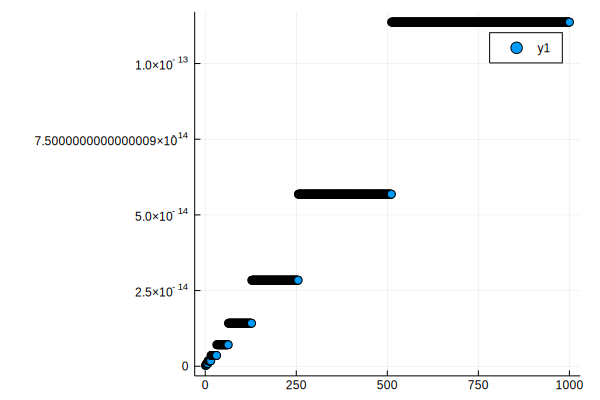

In [32]:
# Float64
Y = Float64[]
it = Float64(1.0)

for i = 1:1000
    push!(Y,eps(it))
    it += Float64(1.0)
end

scatter(1:1:1000, Y)

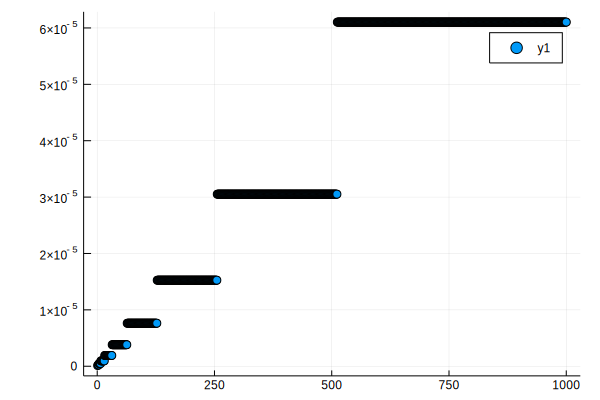

In [33]:
# Float32
Y = Float32[]
it = Float32(1.0)

for i = 1:1000
    push!(Y,eps(it))
    it += Float32(1.0)
end

scatter(1:1:1000, Y)

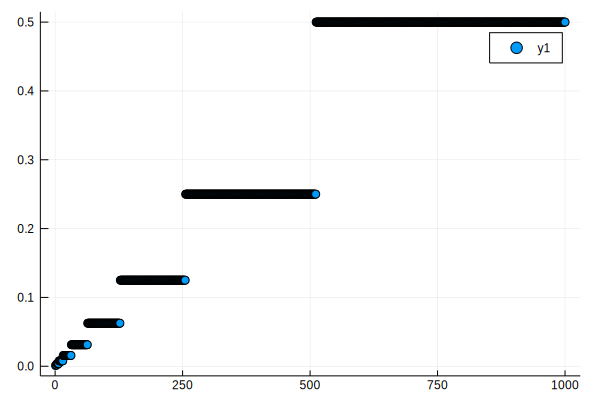

In [34]:
# Float16
Y = Float16[]
it = Float16(1.0)

for i = 1:1000
    push!(Y,eps(it))
    it += Float16(1.0)
end

scatter(1:1:1000, Y)

## Zadanie 3

In [23]:
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>

#/* https://www.gnu.org/software/gsl/doc/html/ieee754.html?highlight=gsl_ieee#c.gsl_ieee_fprintf_float */

int main(){
    float f = 1.0;
    for(int i = 0; i < 150; i++){
        f /= 2;
        gsl_ieee_printf_float(&f);
        printf("\n");
    }
}


In [35]:
run(`/Users/jakub/CLionProjects/mownit_lab1_cw3/a.out`)

 1.00000000000000000000000*2^-1
 1.00000000000000000000000*2^-2
 1.00000000000000000000000*2^-3
 1.00000000000000000000000*2^-4
 1.00000000000000000000000*2^-5
 1.00000000000000000000000*2^-6
 1.00000000000000000000000*2^-7
 1.00000000000000000000000*2^-8
 1.00000000000000000000000*2^-9
 1.00000000000000000000000*2^-10
 1.00000000000000000000000*2^-11
 1.00000000000000000000000*2^-12
 1.00000000000000000000000*2^-13
 1.00000000000000000000000*2^-14
 1.00000000000000000000000*2^-15
 1.00000000000000000000000*2^-16
 1.00000000000000000000000*2^-17
 1.00000000000000000000000*2^-18
 1.00000000000000000000000*2^-19
 1.00000000000000000000000*2^-20
 1.00000000000000000000000*2^-21
 1.00000000000000000000000*2^-22
 1.00000000000000000000000*2^-23
 1.00000000000000000000000*2^-24
 1.00000000000000000000000*2^-25
 1.00000000000000000000000*2^-26
 1.00000000000000000000000*2^-27
 1.00000000000000000000000*2^-28
 1.00000000000000000000000*2^-29
 1.00000000000000000000000*2^-30
 1.0000000000000000

Process(`/Users/jakub/CLionProjects/mownit_lab1_cw3/a.out`, ProcessExited(0))

## Zadanie 4

In [119]:
# example 1
# a^2 - b^2 vs (a+b)(a-b)
# 0.1(dec) in binary -> 0.0(0011) so we can not write it precisely in decimal
function ex1_notstablequadratic(a, b)
    return Float64((a * a) - (b * b))
end

function ex1_stablequadratic(a, b)
    return Float64((a + b) * (a - b))
end

# example 2
# increasing x time by 0.1 n times
function ex2_notstableincreasing(num, times)
    for i = 1:times
        num += 0.1
    end
    return num
end

function ex2_stableincreasing(num, times)
    return (times*(num))/10 + Float64(1.0)
end
    
    


a = Float64(1.1)
b = Float64(0.1)
for i=1:100
    notstable = ex1_notstablequadratic(a,b)
    stable = ex1_stablequadratic(a,b)
    print("Not stable: \t")
    print(notstable)
    print('\n')
    print("Stable: \t")
    print(stable)
    print('\n')
    print("Diffrence: \t")
    print(stable-notstable)
    print('\n')
    print('\n')
    a += 1.0
    b += 1.0    
end

Not stable: 	1.2000000000000002
Stable: 	1.2000000000000002
Diffrence: 	0.0

Not stable: 	3.2
Stable: 	3.2
Diffrence: 	0.0

Not stable: 	5.200000000000001
Stable: 	5.2
Diffrence: 	-8.881784197001252e-16

Not stable: 	7.1999999999999975
Stable: 	7.199999999999996
Diffrence: 	-1.7763568394002505e-15

Not stable: 	9.2
Stable: 	9.2
Diffrence: 	0.0

Not stable: 	11.199999999999996
Stable: 	11.2
Diffrence: 	3.552713678800501e-15

Not stable: 	13.200000000000003
Stable: 	13.2
Diffrence: 	-3.552713678800501e-15

Not stable: 	15.200000000000003
Stable: 	15.2
Diffrence: 	-3.552713678800501e-15

Not stable: 	17.19999999999999
Stable: 	17.2
Diffrence: 	1.0658141036401503e-14

Not stable: 	19.200000000000003
Stable: 	19.2
Diffrence: 	-3.552713678800501e-15

Not stable: 	21.200000000000003
Stable: 	21.2
Diffrence: 	-3.552713678800501e-15

Not stable: 	23.200000000000003
Stable: 	23.2
Diffrence: 	-3.552713678800501e-15

Not stable: 	25.19999999999999
Stable: 	25.2
Diffrence: 	1.0658141036401503e-14

